## Importing Libraries

In [1]:
# Data Processing
import numpy as np
import pandas as pd
from collections import Counter

# Importing tde
import tde

# Visualization
import matplotlib.pyplot as plt

# To generate the for loops
import glob
import os
from matplotlib import ticker

## Reading Mice Data

In [2]:
# Get the data
folder = "/Users/yoddmena/Downloads/Research/Telemetry_edited/"

files = glob.glob( folder + "Ex *.xlsx" ) 

dfs = []
min = []
#k = 0
for file in files:
    #k = k +1
    #if k > 2:
        #break
    df = pd.read_excel(file) # reading the excel file
    
    mice_min = df.iloc[:,0] #getting only the minutes
    mice_temp = df.iloc[:,3::2] # slicing the data for only temperature
    
    min.append(mice_min) # adding minutes into the list
    dfs.append(mice_temp) # adding the file into the list

## Plotting Each Time Series with its Mean

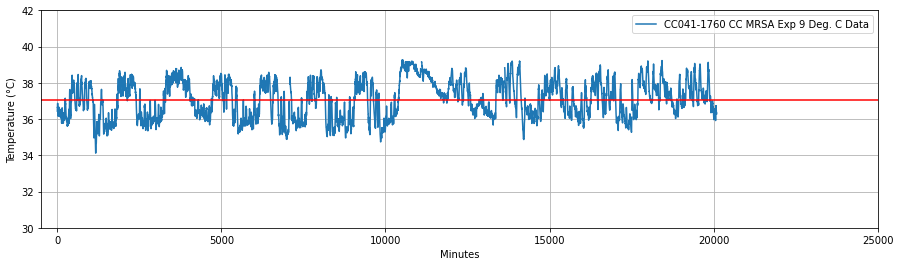

In [4]:
fig,ax = plt.subplots(figsize=(15,4))
fig.set_facecolor("white") # Changing the border to white
mean = []

# Plotting each file's temperature vs. minutes
for i in range(len(min)):
    mice_min = min[i] # renaming the minutes to the current column
    mice_temp = dfs[i] # renaming the temperature to the current column
    x_axis = mice_min # defining the x axis
    
    # A for loop for the temperatures (extracting only the column of data frame)
    for j in range(mice_temp.shape[1]): 
        ax.cla() # clear axis for each individual mouse
        y_axis = mice_temp.iloc[:,j] # defining the y axis
        names = mice_temp.columns[j] # extracting the names of the columns (mouse name)
        
        # Calculating the mean
        mean_value = np.mean(y_axis)
        mean.append(mean_value)
        
        # Plotting the time series
        ax.plot(x_axis, y_axis, label=names) # plotting the time series
        ax.grid(True) # adding a grid
        ax.set_xlim(-500,25000,2000)
        ax.set_ylim(30,42,0.5)
        ax.set_xlabel("Minutes") #x label
        ax.set_ylabel('Temperature (°C)') #y label
        ax.legend() # name of the mouse
        suffix = str(i).zfill(4)
        

        # Add a horizontal line for the mean value
        plt.axhline(mean_value, color='r', linestyle='-', label='Mean')
        
        # Saving the Image
        #filename = "Mean/%s.png"%names # saving the file as the name of the mouse
        #fig.savefig(filename)

## Calculating the Means

In [3]:
mean_values = []  # List to store mean values
mouse_names = []  # List to store mouse names

# Calculating the mean for each mouse's time series
for i in range(len(min)):
    mice_min = min[i]  # Renaming the minutes to the current column
    mice_temp = dfs[i]  # Renaming the temperature to the current column
    x_axis = mice_min  # Defining the x axis

    # A for loop for the temperatures (extracting only the column of data frame)
    for j in range(mice_temp.shape[1]):
        y_axis = mice_temp.iloc[:, j]  # Defining the y axis
        mouse_name = mice_temp.columns[j]  # Extracting the name of the column (mouse name)

        # Calculating the mean
        mean_value = y_axis.mean()

        # Appending the mean and mouse name to the lists
        mean_values.append(mean_value)
        mouse_names.append(mouse_name)

# Creating a DataFrame from the mean values and mouse names
df_means = pd.DataFrame({'Mouse': mouse_names, 'Mean': mean_values})

# Filter the DataFrame for a specific mouse name
specific_mouse = 'B6-102 EXP. 3 MRSA Deg. C Data'  # Replace 'Mouse1' with the desired mouse name
filtered_df = df_means.loc[df_means['Mouse'] == specific_mouse]


        

In [33]:
# Uncomment to see all the means
#df_means

In [34]:
filtered_df

,Mouse,Mean
103,B6-102 EXP. 3 MRSA Deg. C Data,37.024581


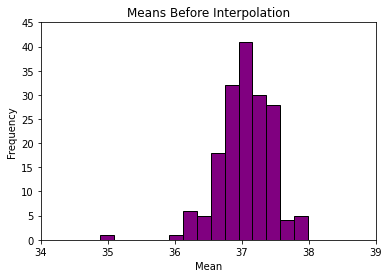

In [11]:
mean_hist_og = plt.hist(mean_values, bins=15, color='purple', edgecolor='black')
# Set the y-axis limit
plt.ylim(0,45) 
plt.xlim(34,39)

# Adding x and y labels
plt.xlabel('Mean')
plt.ylabel('Frequency')
plt.title('Means Before Interpolation') 


# Saving the Image
filename1 = "Means_histogram.png"   # saving the file as the name of the mouse
plt.savefig(filename1, facecolor='white')

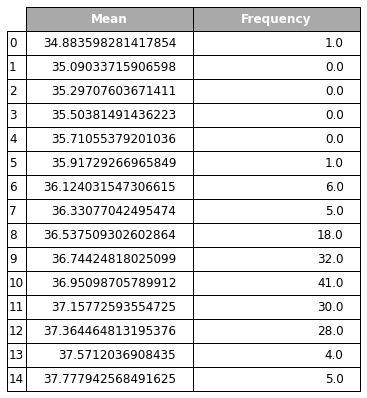

In [6]:
histogram, bin_edges = np.histogram(mean_values, bins=15)  

# Create a DataFrame from the histogram data
df_histogram = pd.DataFrame({'Mean': bin_edges[:-1], 'Frequency': histogram})

# Create a table visualization using matplotlib
fig, ax = plt.subplots(figsize=(6, 4))
ax.axis('off')
table = ax.table(cellText=df_histogram.values, colLabels=df_histogram.columns, rowLabels=df_histogram.index, loc='center')
table.auto_set_font_size(False)
table.set_fontsize(12)
table.scale(1, 2)  # Adjust the scaling factor as per your requirements

# Modify the column names as dark color boxes
for i, col_name in enumerate(df_histogram.columns):
    cell = table[0, i]
    cell.set_text_props(weight='bold', color='white')
    cell.set_facecolor('darkgray')
    
# Print the resulting DataFrame
#print(df_histogram)

# Save the table as an image file
plt.savefig('mean_freq_table.png', bbox_inches='tight', facecolor='white')